In [1]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"ayanader4","key":"87b0426595640924f1ad0128c0b9f7a2"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d alincijov/self-driving-cars

self-driving-cars.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('self-driving-cars.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [5]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import os                                   # For os commands (dir cwd etc)
import zipfile                              # for extracting data set files
                                 
import skimage                              # for scikit-learn image operations
import skimage.io
import skimage.transform
from matplotlib import pyplot as plt        # for visualizing data
import numpy as np                          # for numerical python
import random                               # for random sampling in range(),number_of_values
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
import tensorflow as tf
import keras
import cv2

In [7]:
print(os.listdir('/content/files'))

['labels_val.csv', 'labels_trainval.csv', 'labels_train.csv', 'images']


In [8]:
original = pd.read_csv('/content/files/labels_trainval.csv')


In [9]:
df = original.copy()
df.head()

frame  xmin  xmax  ymin  ymax  class_id
0  1478019952686311006.jpg   237   251   143   155         1
1  1478019952686311006.jpg   437   454   120   186         3
2  1478019953180167674.jpg   218   231   146   158         1
3  1478019953689774621.jpg   171   182   141   154         2
4  1478019953689774621.jpg   179   191   144   155         1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165105 entries, 0 to 165104
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   frame     165105 non-null  object
 1   xmin      165105 non-null  int64 
 2   xmax      165105 non-null  int64 
 3   ymin      165105 non-null  int64 
 4   ymax      165105 non-null  int64 
 5   class_id  165105 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 7.6+ MB


In [11]:
df.describe()

xmin           xmax           ymin           ymax  \
count  165105.000000  165105.000000  165105.000000  165105.000000   
mean      202.407607     235.747185     134.405705     163.565610   
std       114.850014     116.941637      20.423928      28.800355   
min         0.000000       3.000000       0.000000       0.000000   
25%       118.000000     150.000000     131.000000     152.000000   
50%       200.000000     224.000000     139.000000     162.000000   
75%       281.000000     313.000000     145.000000     173.000000   
max       475.000000     479.000000     275.000000     299.000000   

            class_id  
count  165105.000000  
mean        1.681033  
std         1.311622  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         2.000000  
max         5.000000

In [12]:
# df.loc[df['xmin'] == 0, 'xmin'] = 1
# df.loc[df['ymin'] == 0, 'ymin'] = 1
# df.loc[df['xmax'] == 0, 'xmax'] = 1
# df.loc[df['ymax'] == 0, 'ymax'] = 1

In [13]:
df.tail()

frame  xmin  xmax  ymin  ymax  class_id
165100  1479506176491553178.jpg   166   186   139   156         1
165101  1479506176491553178.jpg   182   204   142   153         1
165102  1479506176491553178.jpg   239   261   139   155         1
165103  1479506176491553178.jpg   259   280   139   157         1
165104  1479506176491553178.jpg   284   324   137   168         1

In [14]:
df = df[:30000]

In [15]:
a = list(enumerate(df.frame.values))
len(a)

30000

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   frame     30000 non-null  object
 1   xmin      30000 non-null  int64 
 2   xmax      30000 non-null  int64 
 3   ymin      30000 non-null  int64 
 4   ymax      30000 non-null  int64 
 5   class_id  30000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.4+ MB


In [17]:
from PIL import Image
import glob

In [18]:
df.head()

frame  xmin  xmax  ymin  ymax  class_id
0  1478019952686311006.jpg   237   251   143   155         1
1  1478019952686311006.jpg   437   454   120   186         3
2  1478019953180167674.jpg   218   231   146   158         1
3  1478019953689774621.jpg   171   182   141   154         2
4  1478019953689774621.jpg   179   191   144   155         1

In [19]:
df.iloc[2, 1]

218

In [20]:
img = np.asarray(Image.open('/content/files/images/1478019952686311006.jpg'))
img.shape

(300, 480, 3)

In [21]:
print(a)

[(0, '1478019952686311006.jpg'), (1, '1478019952686311006.jpg'), (2, '1478019953180167674.jpg'), (3, '1478019953689774621.jpg'), (4, '1478019953689774621.jpg'), (5, '1478019953689774621.jpg'), (6, '1478019953689774621.jpg'), (7, '1478019953689774621.jpg'), (8, '1478019954186238236.jpg'), (9, '1478019954186238236.jpg'), (10, '1478019954186238236.jpg'), (11, '1478019954186238236.jpg'), (12, '1478019954186238236.jpg'), (13, '1478019954685370994.jpg'), (14, '1478019954685370994.jpg'), (15, '1478019954685370994.jpg'), (16, '1478019954685370994.jpg'), (17, '1478019955185244088.jpg'), (18, '1478019955185244088.jpg'), (19, '1478019955185244088.jpg'), (20, '1478019955185244088.jpg'), (21, '1478019955679801306.jpg'), (22, '1478019955679801306.jpg'), (23, '1478019955679801306.jpg'), (24, '1478019956186247611.jpg'), (25, '1478019956186247611.jpg'), (26, '1478019956186247611.jpg'), (27, '1478019956680248165.jpg'), (28, '1478019956680248165.jpg'), (29, '1478019956680248165.jpg'), (30, '1478019957180

In [22]:
labels = {1:'car',
          2:'truck',
          3:'pedestrian', 
          4:'bicyclist', 
          5:'light'}
target2labels = labels.copy()
target2labels 

{1: 'car', 2: 'truck', 3: 'pedestrian', 4: 'bicyclist', 5: 'light'}

In [23]:
class_counts = df['class_id'].value_counts(sort=True).to_dict()
class_counts = dict(sorted(class_counts.items()))
class_counts

{1: 20001, 2: 720, 3: 1242, 4: 330, 5: 7707}

In [24]:
class_counts.keys()

dict_keys([1, 2, 3, 4, 5])

In [25]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = '/content/files/images/'

for class_id in class_counts:
    first_row = df[df['class_id'] == class_id].iloc[0]
    
    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

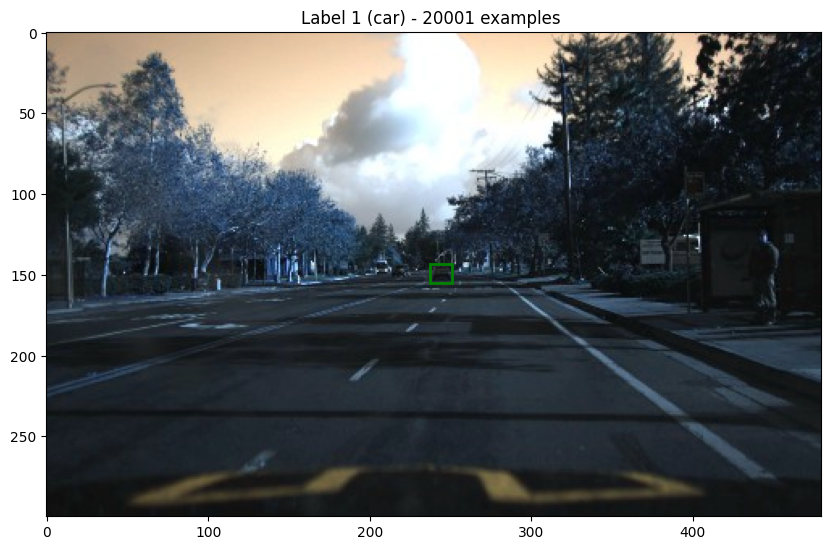

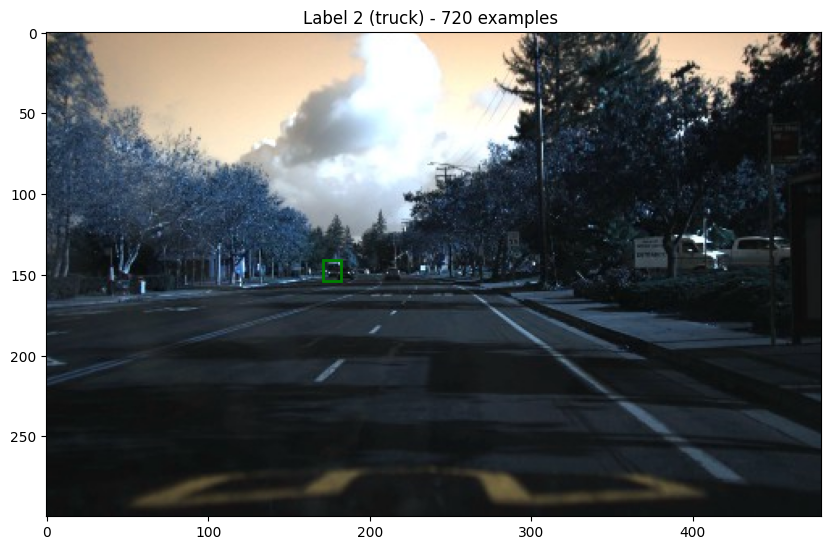

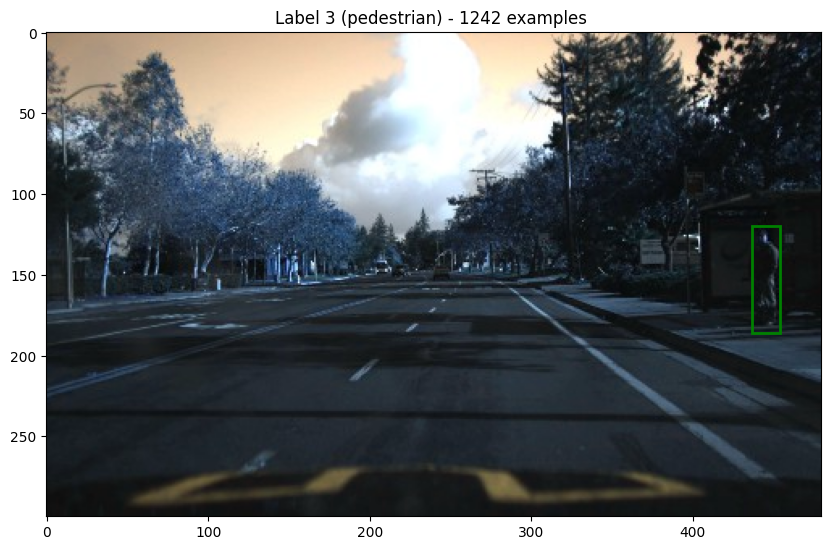

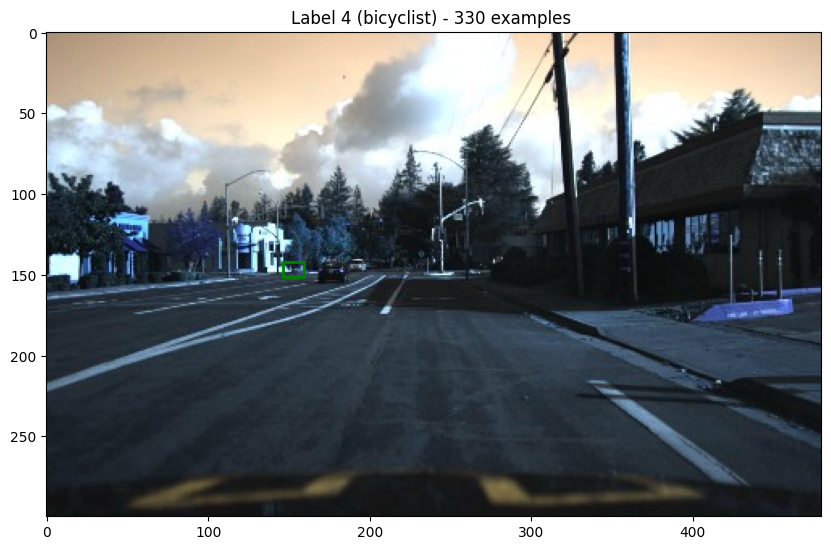

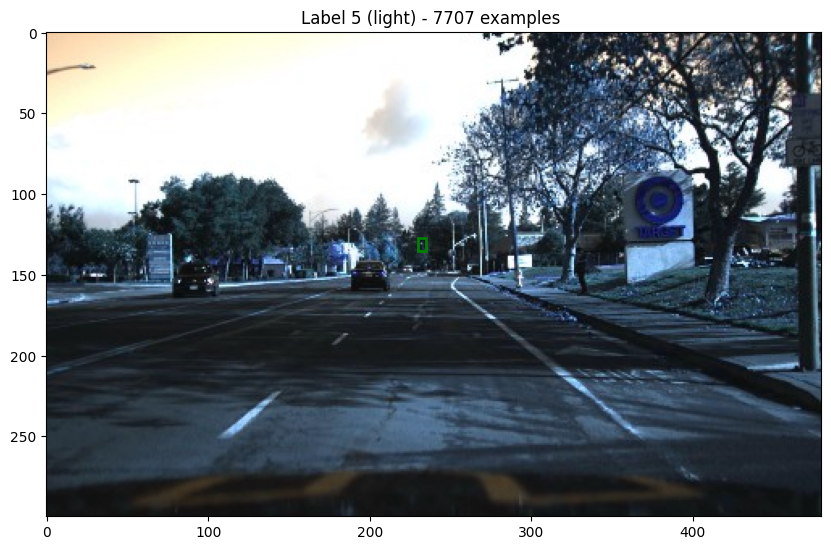

In [26]:
for i in class_counts:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(10, 10))
    plt.title("Label {0} ({1}) - {2} examples ".format(i, labels[i], class_counts[i]))
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))
    
    plt.show()

In [27]:
images[1].shape

(300, 480, 3)

In [28]:
def new_df(df):
    for (i, fname) in a:
        fpath = f'/content/files/images/{fname}'
        img = np.asarray(Image.open(fpath))
        h ,w ,_ = img.shape
        df.iloc[i, 1] /= w  # xmin
        df.iloc[i, 2] /= w  # xmax
        df.iloc[i, 3] /= h  # ymin
        df.iloc[i, 4] /= h  # ymax
    return df 
df1 = new_df(df)
df1.head()

frame      xmin      xmax      ymin      ymax  class_id
0  1478019952686311006.jpg  0.493750  0.522917  0.476667  0.516667         1
1  1478019952686311006.jpg  0.910417  0.945833  0.400000  0.620000         3
2  1478019953180167674.jpg  0.454167  0.481250  0.486667  0.526667         1
3  1478019953689774621.jpg  0.356250  0.379167  0.470000  0.513333         2
4  1478019953689774621.jpg  0.372917  0.397917  0.480000  0.516667         1

In [29]:
# df1 = df1[df1['xmin']>=0.1]
# df1 = df1[df1['xmax']>=0.1]
# df1 = df1[df1['ymin']>=0.1]
# df1 = df1[df1['ymax']>=0.1]

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   frame     30000 non-null  object 
 1   xmin      30000 non-null  float64
 2   xmax      30000 non-null  float64
 3   ymin      30000 non-null  float64
 4   ymax      30000 non-null  float64
 5   class_id  30000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [31]:
img_id = '1478732595079673268.jpg'
img_details = df1[df1['frame']==img_id]
img_details

frame      xmin      xmax      ymin      ymax  \
24991  1478732595079673268.jpg  0.258333  0.279167  0.376667  0.430000   
24992  1478732595079673268.jpg  0.329167  0.372917  0.470000  0.533333   
24993  1478732595079673268.jpg  0.372917  0.391667  0.480000  0.523333   
24994  1478732595079673268.jpg  0.393750  0.410417  0.473333  0.526667   
24995  1478732595079673268.jpg  0.414583  0.429167  0.466667  0.513333   
24996  1478732595079673268.jpg  0.477083  0.525000  0.446667  0.536667   
24997  1478732595079673268.jpg  0.516667  0.537500  0.280000  0.323333   
24998  1478732595079673268.jpg  0.533333  0.577083  0.466667  0.520000   
24999  1478732595079673268.jpg  0.622917  0.641667  0.380000  0.410000   
25000  1478732595079673268.jpg  0.625000  0.643750  0.363333  0.420000   
25001  1478732595079673268.jpg  0.670833  0.918750  0.380000  0.670000   

       class_id  
24991         5  
24992         1  
24993         1  
24994         1  
24995         1  
24996         1  
24997         5  
24998         1  
24999         5  
25000         5  
25001         1

In [32]:
import cv2
import torch
import torchvision

In [33]:
%load /content/drive/MyDrive/TRG-net-master/trgnet/backbones/components.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/backbones/fpn.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/backbones/mobilenetv3.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/backbones/utils.py

%load /content/drive/MyDrive/TRG-net-master/trgnet/training/reference/coco_eval.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/training/reference/coco_utils.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/training/reference/engine.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/training/reference/transforms.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/training/reference/utils.py

%load /content/drive/MyDrive/TRG-net-master/trgnet/training/train.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/training/utils.py

%load /content/drive/MyDrive/TRG-net-master/trgnet/anchor.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/data.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/grpm.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/misc.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/roi_heads.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/rpn.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/timer.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/trg.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/utils.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/zoo.py

%load /content/drive/MyDrive/TRG-net-master/setup.py

In [34]:
import sys
sys.path.append('/content/drive/MyDrive/TRG-net-master')

In [35]:
import time

import cv2
import torch
import torchvision
import torchvision.transforms as transforms


from PIL import Image

from trgnet.zoo import trgnet_mobilenet_v3_large


In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'

In [37]:
def preprocess_image(img):
  img = torch.tensor(img).permute(2,0,1)
  return img.to(device).float()

In [38]:
from torch.utils.data import DataLoader, Dataset

In [39]:
class SelfDrivingCarDataset(Dataset):
  w , h = 224 , 224
  def __init__(self , df  , image_root_dir = '/content/files/images' ):
    self.image_dir = image_root_dir
    self.df = df
    self.files = glob.glob(self.image_dir + '/*.jpg')
    self.image_infos = df.frame.unique()

  def __len__(self):
    return len(self.image_infos)

  def __getitem__(self ,ix ):
    img_id = self.image_infos[ix]
    img_path = f'/content/files/images/{img_id}'
    img = Image.open(img_path).convert('RGB')
    img = np.array(img.resize((self.w ,self.h) , resample = Image.BILINEAR))/255.
    data = df[df['frame'] == img_id]
    labels = data['class_id'].values.tolist()
    data = data[['xmin', 'ymin' ,'xmax' ,'ymax']].values
    data[:,[0,2]] *=  self.w
    data[:,[1,3]] *=  self.h
    boxes = data.astype(np.uint32).tolist()
    target = {}
    target["boxes"] = torch.Tensor(boxes).float()
    target["labels"] = torch.Tensor([i for i in labels]).long()
    img = preprocess_image(img)
    return img , target 

  def collate_fn(self ,batch):
    return tuple(zip(*batch))

from sklearn.model_selection import train_test_split as tts

x, test_ids = tts(df1.frame.unique(), test_size = 0.15, random_state = 99)  # test size will be 15%
trn_ids, val_ids = tts(x, train_size = 0.8225, random_state = 99)  # train size will be 70%, val 15%

trn_df, val_df, test_df = df1[df1['frame'].isin(trn_ids)], df1[df1['frame'].isin(val_ids)], df1[df1['frame'].isin(test_ids)]

train_ds = SelfDrivingCarDataset(trn_df)
val_ds = SelfDrivingCarDataset(val_df)
test_ds = SelfDrivingCarDataset(test_df)

train_loader = DataLoader(train_ds,  batch_size = 4, collate_fn = train_ds.collate_fn, drop_last =True)
val_loader = DataLoader(val_ds, batch_size = 4, collate_fn = val_ds.collate_fn, drop_last = True)
test_loader = DataLoader(test_ds, batch_size = 4, collate_fn = test_ds.collate_fn, drop_last = True)

In [40]:
len(train_ds), len(val_ds), len(test_ds)

(2690, 581, 578)

In [41]:
model = trgnet_mobilenet_v3_large(
    pretrained=False, grpm_min_area=50, grpm_lr=0.01, 
    grpm_show_output=True).to(device)

# from torchviz import make_dot
# batch = next(iter(train_loader))
# x = torch.zeros(1, 3, 224, 224, dtype=torch.float, requires_grad=True).to(device)
# # batch[1]
# print(batch[0])
# # make_dot(model(batch[0]))
# y = model(batch[0])

# make_dot(y.mean())

In [42]:
model.eval()

TRGNet(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(320,), max_size=640, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): ConvNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d()
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d()
            (2): ReLU(inplace=True)
          )
          (1): ConvNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
        )
      )
      (2): InvertedResidual(
        (block): Sequential(
          (0): ConvNormActivation(
  

In [43]:
def train_batch(inputs, model , optimizer):
  model.train()
  input , targets = inputs 
  input = list(image.to(device) for image in input)
  targets = [{k:v.to(device) for k,v in t.items()} for t in targets]
  optimizer.zero_grad()
  losses = model(input, targets)
  loss = sum(loss for loss in losses.values())
  loss.backward()
  optimizer.step()
  return loss, losses 

@torch.no_grad()
def validate_batch(inputs, models):
  input, targets = inputs 
  input = list(image.to(device) for image in input)
  targets = [{k:v.to(device) for k,v in t.items()} for t in targets]
  losses = model(input, targets)
  loss = sum(loss for loss in losses.values())
  return loss, losses

@torch.no_grad()
def test_batch(inputs, models):
  input, targets = inputs 
  input = list(image.to(device) for image in input)
  targets = [{k:v.to(device) for k,v in t.items()} for t in targets]
  losses = model(input, targets)
  loss = sum(loss for loss in losses.values())
  return loss, losses

In [44]:
optimizer = torch.optim.SGD(model.parameters() , lr=0.005 , 
                            momentum = 0.9 , weight_decay= 0.0005 )

In [45]:
loss_criterions = ['loss_classifier',
          'loss_box_reg',
          'loss_objectness',
          'loss_rpn_box_reg'] 

EPOCHS = 5

In [46]:
# import time 
# start = time.time()
# tcl , trl , tol , trpnl ,ttl = [] ,[] ,[] ,[] ,[] 
# vcl , vrl , vol , vrpnl ,vtl = [] ,[] ,[] ,[] ,[] 
# # tcl , vrl , vol , vrpnl ,vtl = [] ,[] ,[] ,[] ,[] 
# for epoch in range(EPOCHS):
#   print(f'EPOCH {epoch+1}')
#   tecl , terl , teol , terpnl ,tetl = [] ,[] ,[] ,[] ,[] 
#   vecl , verl , veol , verpnl ,vetl = [] ,[] ,[] ,[] ,[]
#   for ix , batch in enumerate(train_loader):
#     loss , losses = train_batch(batch , model , optimizer )
#     los_loss , reg_loss , loss_obj , loss_rpn_box_reg = [losses[k] for k in  loss_criterions]
#     tot_loss = los_loss + reg_loss + loss_obj + loss_rpn_box_reg
#     tecl.append(los_loss.detach().cpu().numpy()) , terl.append(reg_loss.detach().cpu().numpy()) , teol.append(loss_obj.detach().cpu().numpy()) 
#     terpnl.append(loss_rpn_box_reg.detach().cpu().numpy()) ,tetl.append(tot_loss.detach().cpu().numpy())
#     if ix%600 == 0 and ix!=0:
#         print(f'{ix} batches completed')
#   print(f'Training - Total Loss {np.mean(tetl):.5f} | Classification Loss {np.mean(tecl):.5f} | Regression Loss {np.mean(terl):.5f} ',end=" ")
#   print(f'| Object Loss {np.mean(teol):.5f} | RPN Loss {np.mean(terpnl):.5f}' )
#   tcl.append(np.mean(tecl)) , trl.append(np.mean(terl)) , tol.append(np.mean(teol)) , trpnl.append(np.mean(terpnl)) ,ttl.append(np.mean(tetl))


#   for ix , batch in enumerate(val_loader):
#     loss , losses = validate_batch(batch ,model )
#     los_loss , reg_loss , loss_obj , loss_rpn_box_reg = [losses[k] for k in  loss_criterions]
#     tot_loss = los_loss + reg_loss + loss_obj + loss_rpn_box_reg
#     vecl.append(los_loss.detach().cpu().numpy()) , verl.append(reg_loss.detach().cpu().numpy()) , veol.append(loss_obj.detach().cpu().numpy()) 
#     verpnl.append(loss_rpn_box_reg.detach().cpu().numpy()) ,vetl.append(tot_loss.detach().cpu().numpy())
  
#   print(f'Validation - Total Loss {np.mean(vetl):.5f} | Classification Loss {np.mean(vecl):.5f} | Regression Loss {np.mean(verl):.5f} ',end=" ")
#   print(f'| Object Loss {np.mean(veol):.5f} | RPN Loss {np.mean(verpnl):.5f}' )

#   vcl.append(np.mean(vecl)) , vrl.append(np.mean(verl)) , vol.append(np.mean(veol)) , vrpnl.append(np.mean(verpnl)) ,vtl.append(np.mean(vetl))

#   print('===============================================================================Done')
#   print()
# print('                    ****************** Training Completed *****************                             ')
# end = time.time()
# total_time = end-start

In [47]:
import time

start = time.time()
train_cl, train_rl, train_ol, train_rpnl, train_tl = [], [], [], [], []
val_cl, val_rl, val_ol, val_rpnl, val_tl = [], [], [], [], []
test_cl, test_rl, test_ol, test_rpnl, test_tl = [] ,[] ,[] ,[] ,[]
for epoch in range(EPOCHS):
    print(f'EPOCH {epoch + 1}')
    train_epoch_cl, train_epoch_rl, train_epoch_ol, train_epoch_rpnl, train_epoch_tl = [], [], [], [], []
    val_epoch_cl, val_epoch_rl, val_epoch_ol, val_epoch_rpnl, val_epoch_tl = [], [], [], [], []
    test_epoch_cl, test_epoch_rl, test_epoch_ol, test_epoch_rpnl, test_epoch_tl = [], [], [], [], []
    for ix, batch in enumerate(train_loader):
        loss, losses = train_batch(batch, model, optimizer)
        los_loss, reg_loss, loss_obj, loss_rpn_box_reg = [losses[k] for k in loss_criterions]
        tot_loss = los_loss + reg_loss + loss_obj + loss_rpn_box_reg
        train_epoch_cl.append(los_loss.detach().cpu().numpy()), train_epoch_rl.append(reg_loss.detach().cpu().numpy()), train_epoch_ol.append(
            loss_obj.detach().cpu().numpy())
        train_epoch_rpnl.append(loss_rpn_box_reg.detach().cpu().numpy()), train_epoch_tl.append(tot_loss.detach().cpu().numpy())
        if ix % 600 == 0 and ix != 0:
            print(f'{ix} batches completed')
    print(
        f'Training - Total Loss {np.mean(train_epoch_tl):.5f} | Classification Loss {np.mean(train_epoch_cl):.5f} | Regression Loss {np.mean(train_epoch_rl):.5f} ',
        end=" ")
    print(f'| Object Loss {np.mean(train_epoch_ol):.5f} | RPN Loss {np.mean(train_epoch_rpnl):.5f}')
    train_cl.append(np.mean(train_epoch_cl)), train_rl.append(np.mean(train_epoch_rl)), train_ol.append(np.mean(train_epoch_ol)), train_rpnl.append(
        np.mean(train_epoch_rpnl)), train_tl.append(np.mean(train_epoch_tl))

    for ix, batch in enumerate(val_loader):
        loss, losses = validate_batch(batch, model)
        los_loss, reg_loss, loss_obj, loss_rpn_box_reg = [losses[k] for k in loss_criterions]
        tot_loss = los_loss + reg_loss + loss_obj + loss_rpn_box_reg
        val_epoch_cl.append(los_loss.detach().cpu().numpy()), val_epoch_rl.append(reg_loss.detach().cpu().numpy()), val_epoch_ol.append(
            loss_obj.detach().cpu().numpy())
        val_epoch_rpnl.append(loss_rpn_box_reg.detach().cpu().numpy()), val_epoch_tl.append(tot_loss.detach().cpu().numpy())

    print(
        f'Validation - Total Loss {np.mean(val_epoch_tl):.5f} | Classification Loss {np.mean(val_epoch_cl):.5f} | Regression Loss {np.mean(val_epoch_rl):.5f} ',
        end=" ")
    print(f'| Object Loss {np.mean(val_epoch_ol):.5f} | RPN Loss {np.mean(val_epoch_rpnl):.5f}')

    val_cl.append(np.mean(val_epoch_cl)), val_rl.append(np.mean(val_epoch_rl)), val_ol.append(np.mean(val_epoch_ol)), val_rpnl.append(
        np.mean(val_epoch_rpnl)), val_tl.append(np.mean(val_epoch_tl))
    
    
    for ix, batch in enumerate(test_loader):
        loss, losses = test_batch(batch, model)
        los_loss, reg_loss, loss_obj, loss_rpn_box_reg = [losses[k] for k in loss_criterions]
        tot_loss = los_loss + reg_loss + loss_obj + loss_rpn_box_reg
        test_epoch_cl.append(los_loss.detach().cpu().numpy()), test_epoch_rl.append(reg_loss.detach().cpu().numpy()), test_epoch_ol.append(
            loss_obj.detach().cpu().numpy())
        test_epoch_rpnl.append(loss_rpn_box_reg.detach().cpu().numpy()), test_epoch_tl.append(tot_loss.detach().cpu().numpy())

    print(
        f'Testing - Total Loss {np.mean(test_epoch_tl):.5f} | Classification Loss {np.mean(test_epoch_cl):.5f} | Regression Loss {np.mean(test_epoch_rl):.5f} ',
        end=" ")
    print(f'| Object Loss {np.mean(test_epoch_ol):.5f} | RPN Loss {np.mean(test_epoch_rpnl):.5f}')


    test_cl.append(np.mean(test_epoch_cl)), test_rl.append(np.mean(test_epoch_rl)), test_ol.append(np.mean(test_epoch_ol)), test_rpnl.append(
        np.mean(test_epoch_rpnl)), test_tl.append(np.mean(test_epoch_tl))
    print('=============================================================================== Done')
    print()
print('                    ****************** Training Completed *****************                             ')
end = time.time()
total_time = end - start

EPOCH 1
600 batches completed
Training - Total Loss 0.71989 | Classification Loss 0.23585 | Regression Loss 0.03895  | Object Loss 0.37044 | RPN Loss 0.07465
Validation - Total Loss 0.39805 | Classification Loss 0.12236 | Regression Loss 0.02253  | Object Loss 0.18153 | RPN Loss 0.07164
Testing - Total Loss 0.38533 | Classification Loss 0.11884 | Regression Loss 0.02276  | Object Loss 0.17367 | RPN Loss 0.07007
=============================================================================== Done

EPOCH 2
600 batches completed
Training - Total Loss 0.37175 | Classification Loss 0.11598 | Regression Loss 0.01939  | Object Loss 0.17526 | RPN Loss 0.06113
Validation - Total Loss 0.37592 | Classification Loss 0.11144 | Regression Loss 0.01715  | Object Loss 0.17707 | RPN Loss 0.07027
Testing - Total Loss 0.36501 | Classification Loss 0.10883 | Regression Loss 0.01819  | Object Loss 0.16949 | RPN Loss 0.06850
=============================================================================== Done

In [48]:
print(f'Total Time Taken : {total_time} seconds')

Total Time Taken : 618.2322254180908 seconds


In [49]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
def plot_pf(tl, vl, head):
    plt.plot(epochs, tl, 'b', label='Training loss')
    plt.plot(epochs, vl, 'r', label='Validation loss')
    plt.title(head)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid('off')
    plt.show()

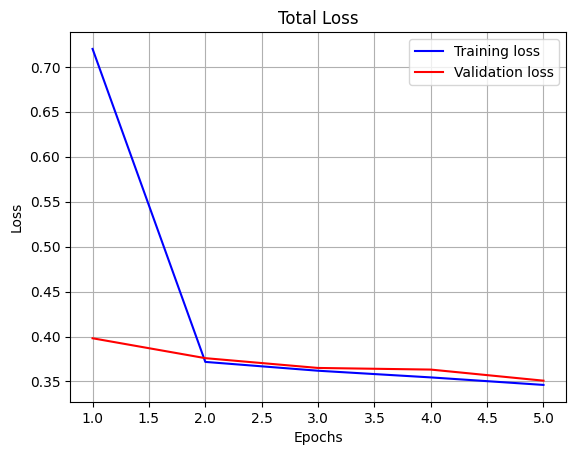

In [50]:
plot_pf(train_tl, val_tl, "Total Loss")

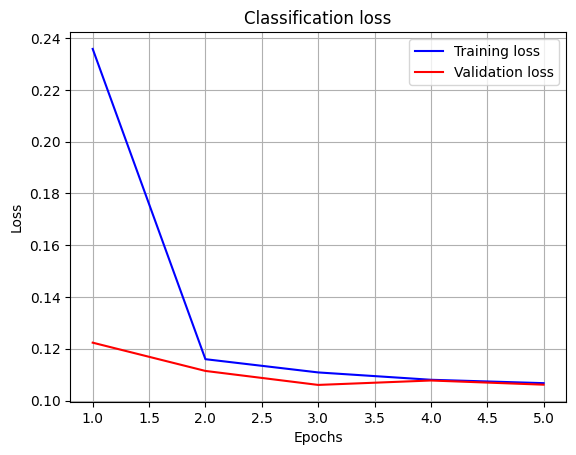

In [51]:
plot_pf(train_cl, val_cl, 'Classification loss')

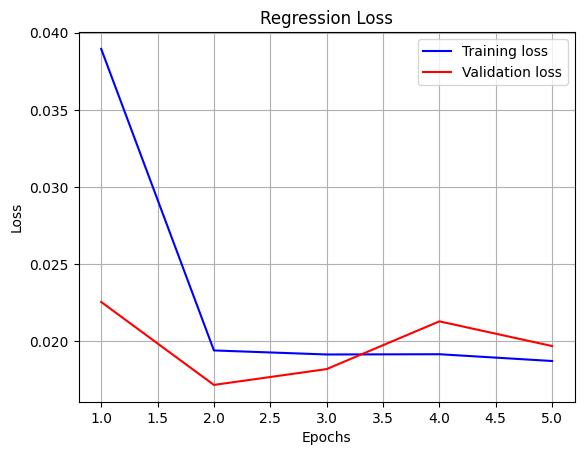

In [52]:
plot_pf(train_rl, val_rl, "Regression Loss")

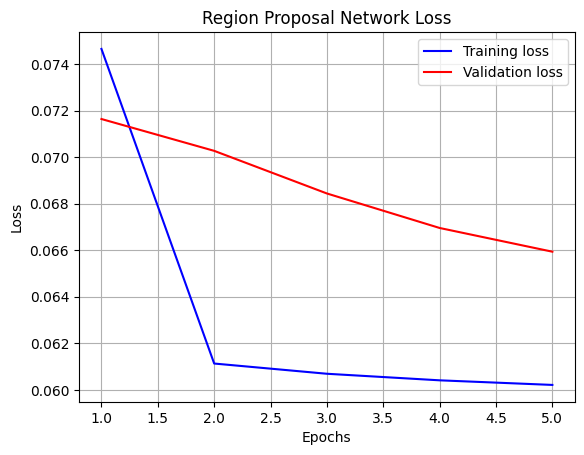

In [53]:
plot_pf(train_rpnl, val_rpnl, "Region Proposal Network Loss")

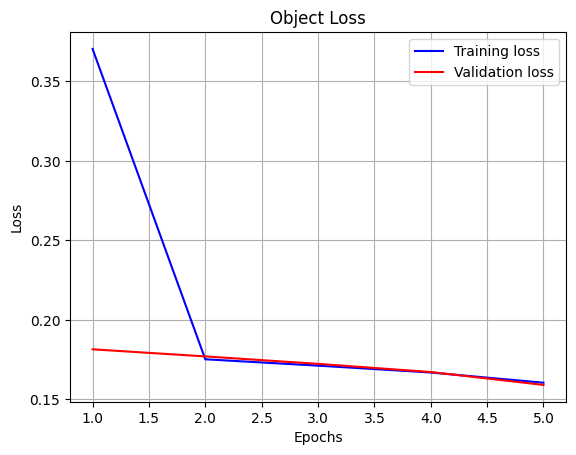

In [54]:
plot_pf(train_ol, val_ol, "Object Loss")

In [55]:
print(f'''
Training Classification Loss = {train_cl}  
Training Regression Loss = {train_rl} 
Training Object Loss = {train_ol} 
Training Region Proposal Network Loss = {train_rpnl} 
Training Total Loss = {train_tl}''')


Training Classification Loss = [0.23585133, 0.1159757, 0.11085965, 0.1080242, 0.10671426]  
Training Regression Loss = [0.038952466, 0.019387074, 0.019125039, 0.01914114, 0.018701142] 
Training Object Loss = [0.37043905, 0.1752591, 0.17126033, 0.16693911, 0.16051929] 
Training Region Proposal Network Loss = [0.074647866, 0.061131366, 0.06069206, 0.060410045, 0.060212504] 
Training Total Loss = [0.7198907, 0.37175325, 0.3619371, 0.3545145, 0.3461472]


In [56]:
print(f'''
Validation Classification Loss = {val_cl}  
Validation Regression Loss = {val_rl} 
Validation Object Loss  = {val_ol} 
Validation Region Proposal Network Loss = {val_rpnl} 
Validation Total Loss = {val_tl}''')


Validation Classification Loss = [0.12235618, 0.111435555, 0.10603176, 0.107740425, 0.10612407]  
Validation Regression Loss = [0.022532906, 0.017149616, 0.018176818, 0.021274835, 0.019672273] 
Validation Object Loss  = [0.18152674, 0.17706709, 0.17237799, 0.16724822, 0.1591343] 
Validation Region Proposal Network Loss = [0.07163627, 0.07026904, 0.06843761, 0.06695522, 0.06593628] 
Validation Total Loss = [0.3980521, 0.37592128, 0.36502418, 0.3632187, 0.35086694]


In [57]:
print(f'''
Testing Classification Loss = {test_cl}  
Testing Regression Loss = {test_rl} 
Testing Object Loss = {test_ol} 
Testing Region Proposal Network Loss = {test_rpnl} 
Testing Loss = {test_tl}''')


Testing Classification Loss = [0.118836135, 0.10883328, 0.103070095, 0.104258195, 0.10320734]  
Testing Regression Loss = [0.022761753, 0.018186232, 0.018543953, 0.021066865, 0.020257171] 
Testing Object Loss = [0.17366894, 0.1694948, 0.16563684, 0.16021183, 0.1526741] 
Testing Region Proposal Network Loss = [0.07006655, 0.06849965, 0.0665049, 0.064970024, 0.06392194] 
Testing Loss = [0.3853334, 0.36501396, 0.3537558, 0.3505069, 0.34006053]


In [58]:
from IPython.display import display

In [59]:
!pip install torch_snippets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB

[
    {
        'boxes': tensor[0, 4] n=0 empty grad StackBackward0 cuda:0,
        'labels': tensor[0] i64 empty cuda:0,
        'scores': tensor[0] empty grad IndexBackward0 cuda:0
    },
    {
        'boxes': tensor[0, 4] n=0 empty grad StackBackward0 cuda:0,
        'labels': tensor[0] i64 empty cuda:0,
        'scores': tensor[0] empty grad IndexBackward0 cuda:0
    },
    {
        'boxes': tensor[0, 4] n=0 empty grad StackBackward0 cuda:0,
        'labels': tensor[0] i64 empty cuda:0,
        'scores': tensor[0] empty grad IndexBackward0 cuda:0
    },
    {
        'boxes': tensor[0, 4] n=0 empty grad StackBackward0 cuda:0,
        'labels': tensor[0] i64 empty cuda:0,
        'scores': tensor[0] empty grad IndexBackward0 cuda:0
    }
]

ValueError: ignored

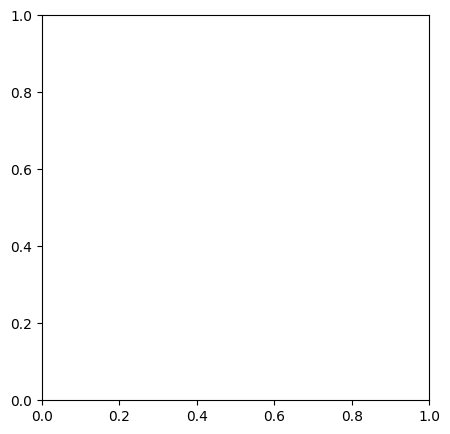

In [60]:
from torchvision.ops import nms
from torch_snippets import *

def decode_output(output):
    'convert tensors to numpy arrays'
    bbs = output['boxes'].cpu().detach().numpy().astype(np.uint16)
    labels = np.array([target2labels[i] for i in output['labels'].cpu().detach().numpy()])
    confs = output['scores'].cpu().detach().numpy()
    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.05)
    bbs, confs, labels = [tensor[ixs] for tensor in [bbs, confs, labels]]

    if len(ixs) == 1:
        bbs, confs, labels = [np.array([tensor]) for tensor in [bbs, confs, labels]]
    return bbs.tolist(), confs.tolist(), labels.tolist()

model.eval()
for ix, (images, targets) in enumerate(val_loader):
    if ix==3: break
    images = [im for im in images]
    outputs = model(images)
    print(outputs)
    for ix, output in enumerate(outputs):
       bbs, confs, labels = decode_output(output)
       info = [f'{l}@{c:.2f}' for l,c in zip(labels, confs)]
       show(images[ix].cpu().permute(1,2,0), bbs=bbs, texts=labels, sz=5)

In [ ]:
import matplotlib.patches as patches
def plot_img_bbox(img, target):
    # plot the image and bboxes
    # Bounding boxes are defined as follows: x-min y-min width height
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    a.imshow(img)
    for box in (target['boxes']):
        x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
        rect = patches.Rectangle((x, y),
                                 width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
        a.add_patch(rect)
    plt.show()

In [ ]:
from torchvision import transforms as torchtrans  

# the function takes the original prediction and the iou threshold.

def apply_nms(orig_prediction, iou_thresh=0.3):
    
    # torchvision returns the indices of the bboxes to keep
    keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
    
    final_prediction = orig_prediction
    final_prediction['boxes'] = final_prediction['boxes'][keep]
    final_prediction['scores'] = final_prediction['scores'][keep]
    final_prediction['labels'] = final_prediction['labels'][keep]
    
    return final_prediction

# function to convert a torchtensor back to PIL image
def torch_to_pil(img):
    return torchtrans.ToPILImage()(img).convert('RGB')



In [ ]:
img, target = test_ds[0][0], test_ds[0][1]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])[0]
print('EXPECTED OUTPUT\n')
plot_img_bbox(torch_to_pil(img), target)
print('MODEL OUTPUT\n')
nms_prediction = apply_nms(prediction, iou_thresh=0.01)

plot_img_bbox(torch_to_pil(img), nms_prediction)

In [ ]:
test_ds[0][1]